# 3.1 CITE-seq GEX

In [1]:
from clustergrammer2 import net
df = {}

clustergrammer2 backend version 0.2.7


In [72]:
import matplotlib.pyplot as plt
%matplotlib inline 
import json_scripts

In [2]:
import numpy as np
import pandas as pd
import gene_exp_10x

In [3]:
filename = '../data/CITE-seq_data/GSE100866_CBMC_8K_13AB_10X-RNA_umi.csv.gz'
df['gex-ini'] = pd.read_csv(filename, compression='gzip', index_col=0)

In [62]:
print(df['gex-ini'].shape)

(36280, 8617)


In [9]:
rows = df['gex-ini'].index.tolist()
len(rows)

36280

In [10]:
mouse_genes = [x for x in rows if 'MOUSE_' in x]
len(mouse_genes)

15879

In [11]:
human_genes = [x for x in rows if 'HUMAN_' in x]
len(human_genes)

20400

In [12]:
len(mouse_genes) + len(human_genes)

36279

In [21]:
print(len(mouse_genes))
print(len(list(set(mouse_genes))))

15879
15879


In [22]:
df['gex-mouse'] = df['gex-ini'].loc[mouse_genes]
df['gex-mouse'].shape

(15879, 8617)

### Filtering out mouse cells

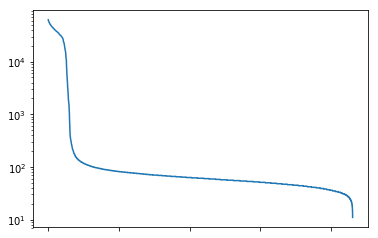

In [47]:
ser_bc_mouse_sum = df['gex-mouse'].sum(axis=0).sort_values(ascending=False)
ser_bc_mouse_sum.plot('line', logy=True)

In [48]:
ser_bc_mouse_sum[ser_bc_mouse_sum<125].shape

(7688,)

In [49]:
ser_bc_mouse_sum[ser_bc_mouse_sum<100].shape

(7339,)

In [50]:
ser_bc_mouse_sum[ser_bc_mouse_sum<50].shape

(2317,)

#### Human cells appear to have <100 mouse gene counts

In [69]:
mouse_cells = ser_bc_mouse_sum[ser_bc_mouse_sum>=100].index.tolist()
human_cells = ser_bc_mouse_sum[ser_bc_mouse_sum<100].index.tolist()

In [70]:
print('number of mouse cells', len(mouse_cells))
print('number of human cells', len(human_cells))

number of mouse cells 1278
number of human cells 7339


#### ~15% Mouse Cells

In [57]:
(8617-7339)/8617

0.14831147731228966

### Make DataFrame with Only Human Cells and Human Genes

In [61]:
df['gex-human'] = df['gex-ini'][human_cells].loc[human_genes]
df['gex-human'].shape

(20400, 7339)

In [66]:
df['gex-human'].to_csv('../data/CITE-seq_data/GSE100866_CBMC_8K_13AB_10X-RNA_umi_HUMAN.csv.gz', compression='gzip')

In [67]:
filename = '../data/CITE-seq_data/GSE100866_CBMC_8K_13AB_10X-RNA_umi_HUMAN.csv.gz'
df['test'] = pd.read_csv(filename, compression='gzip', index_col=0)

In [68]:
df['test'].shape

(20400, 7339)

### Save dictionary of cell types

In [71]:
cell_dict = {}
cell_dict['mouse-cells'] = mouse_cells
cell_dict['human-cells'] = human_cells

In [73]:
json_scripts.save_to_json(filename='../data/CITE-seq_data/human_mouse_cell_dictionary.json', inst_dict=cell_dict)